In [577]:
import pandas as pd

df = pd.read_excel(io='data/cams_20230109.xlsx')
print(df)

df.drop(df.columns[0], axis=1, inplace=True)
print(df)

df.rename(columns={'Широта': 'Latitude', 'Долгота': 'Longitude'}, inplace=True)
print(df)

                                    Адрес на 09.01.2023     Широта    Долгота
0     ул.Подольских Курсантов, напротив д.26, с.1, г...  55.591297  37.635121
1                     Ленинградское ш., д.47, г. Москва  55.846612  37.475901
2                  Варшавское ш., вл.179 с.1, г. Москва  55.553890  37.587548
3                      Энтузиастов ш., д.33Л, г. Москва  55.759266  37.756001
4        МКАД 78 км, внутренняя сторона, с.2, г. Москва  55.887932  37.486518
...                                                 ...        ...        ...
4052                 ул.Мосфильмовская, д.55, г. Москва  55.704088  37.494905
4053       ул.Мосфильмовская, д.88, к.2, с.7, г. Москва  55.704317  37.495166
4054  ул.Велозаводская, д.1 по ул.Автозаводская, г. ...  55.710768  37.665704
4055  Каширское ш., д.80Г, съезд на Шипиловский прое...  55.635877  37.695792
4056  Андропова просп. напротив д.10А, дублер, в цен...  55.692223  37.666714

[4057 rows x 3 columns]
         Широта    Долгота
0     55.591

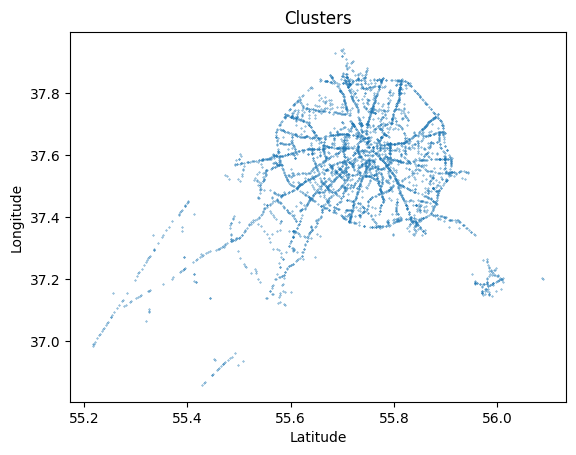

In [578]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['Latitude'], df['Longitude'], s=0.1)
plt.title('Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('output/pic-stock.png')
plt.show()


In [579]:
from sklearn.cluster import KMeans

# предварительная нормализация
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# names = df.columns
# scaled_data = scaler.fit_transform(df)
#
# df_std = pd.DataFrame(scaled_data, columns=names)
#
# print(df_std)

kmeans = KMeans(n_clusters=11, init='k-means++', n_init='auto')
df['label'] = kmeans.fit_predict(df)

print(kmeans.cluster_centers_)
print(df)

df.to_csv('output/labeled.csv', index=False)

[[55.83673776 37.42634929]
 [55.79833617 37.76657681]
 [55.60247632 37.42820349]
 [55.60234966 37.60290214]
 [55.34215124 37.04518118]
 [55.85430568 37.59544738]
 [55.68072651 37.78979415]
 [55.9859438  37.19287616]
 [55.71230693 37.49362269]
 [55.50283733 37.27361421]
 [55.73804276 37.62818118]]
       Latitude  Longitude  label
0     55.591297  37.635121      3
1     55.846612  37.475901      0
2     55.553890  37.587548      3
3     55.759266  37.756001      1
4     55.887932  37.486518      0
...         ...        ...    ...
4052  55.704088  37.494905      8
4053  55.704317  37.495166      8
4054  55.710768  37.665704     10
4055  55.635877  37.695792      3
4056  55.692223  37.666714     10

[4057 rows x 3 columns]


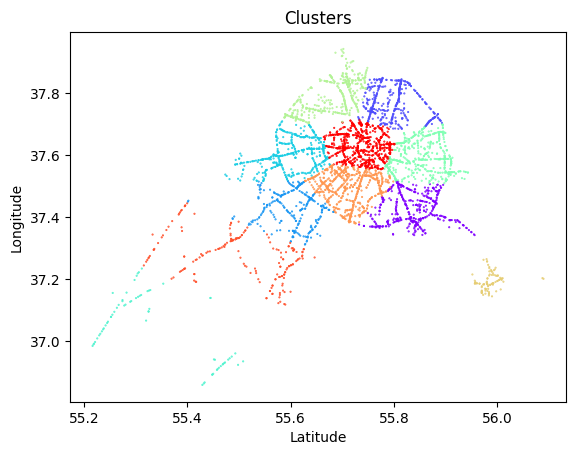

In [580]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['Latitude'], df['Longitude'], c=df['label'], s=0.25, cmap='rainbow')
plt.title('Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('output/pic-11.png')
plt.show()
